In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import sklearn

In [2]:
file = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
file.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
file.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
file.shape

(299, 13)

In [6]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
file.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
file.duplicated().sum()

0

In [9]:
file.describe() 
#the ranges of features are largely different, need to scale the data later
#ages are between 40 to 95.

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
file.corr()['DEATH_EVENT'] # age, ejection_fraction, serum_creatinine and time are more strongly correlated to death event.

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [11]:
file.DEATH_EVENT.value_counts() # out of 299, 96 cases have death event.

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:>

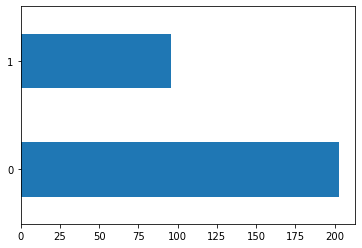

In [12]:
file.DEATH_EVENT.value_counts().plot(kind='barh')

<AxesSubplot:>

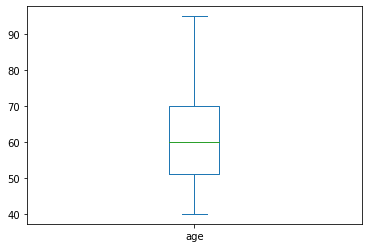

In [13]:
file.age.plot(kind='box') #between 40 to 95 years old. 

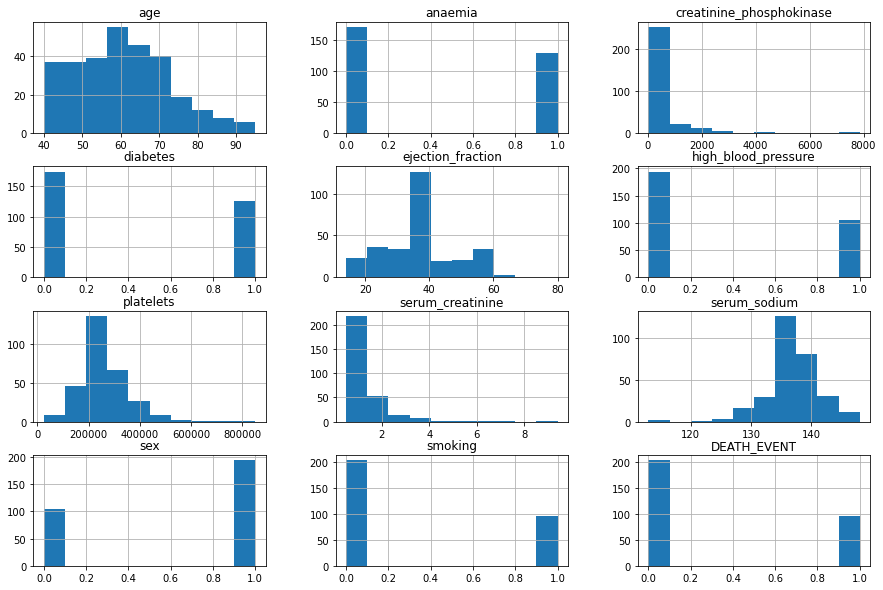

In [14]:
pd.plotting.hist_frame(file.drop(columns=['time']), figsize=(15, 10));

In [15]:
file.sex.value_counts() #sex: Male = 1, Female =0 

1    194
0    105
Name: sex, dtype: int64

Logistic Regression

In [16]:
X = file[['age', 'ejection_fraction', 'serum_creatinine']]
y = file['DEATH_EVENT']
X.shape, y.shape

((299, 3), (299,))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=7, test_size = 0.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 3), (60, 3), (239,), (60,))

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [20]:
scaler = StandardScaler()
logreg = LogisticRegression(random_state=7)

In [21]:
pipe = make_pipeline(scaler, logreg)
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=7))])

In [22]:
y_test_pred = pipe.predict(X_test)

In [23]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.50      0.47      0.49        19

    accuracy                           0.68        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.68      0.68      0.68        60



In [24]:
print(confusion_matrix(y_test, y_test_pred))

[[32  9]
 [10  9]]


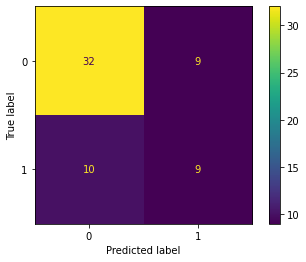

In [25]:
plot_confusion_matrix(pipe, X_test, y_test); #DEATH_EVENT : 0 = No, 1 = Yes
# precision: look at the result of the model ==> vertical level of the map
# recall: look at the data==> horizantal level of the map

In [26]:
# 32 true positive, 9 false negative, 10 false positive and 9 true negative. 
#precision: 32 out of 42 for not dead; 9 out of 18 for dead.
# recall: 32 out of 41 for not dead; 10 out of 19 for dead.

In [27]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='stratified')

In [28]:
dummy.fit(X_train,y_train)

DummyClassifier(strategy='stratified')

In [29]:
dummy.score(X_train, y_train)

0.5648535564853556

In [30]:
# model's accuracy: 0.68 > 0.54. The model is ok. 

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, cv=10, scoring='f1_macro')

In [32]:
print(f"Mean: {scores.mean()}\n Std: {scores.std()}") #the std is close to 0 which makes the mean valuable. The model is ok. 

Mean: 0.6867771783458213
 Std: 0.08135482300174222


Decision Tree

In [33]:
X = file[['age', 'ejection_fraction', 'serum_creatinine']]
y = file['DEATH_EVENT']
X.shape, y.shape

((299, 3), (299,))

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [35]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [36]:
dt.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

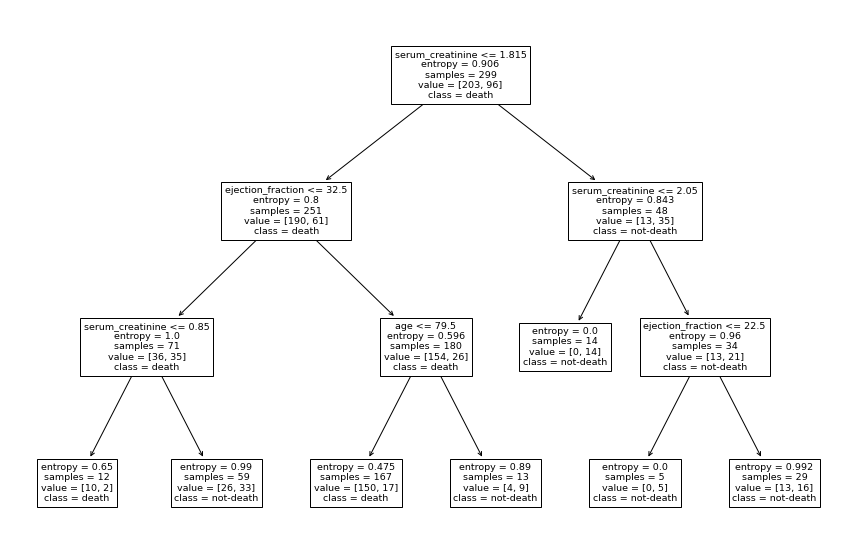

In [37]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt, feature_names=['age', 'ejection_fraction', 'serum_creatinine'], class_names=['death','not-death'])
plt.show()

SVM

In [38]:
X = file[['age', 'ejection_fraction', 'serum_creatinine']]
y = file['DEATH_EVENT']
X.shape, y.shape

((299, 3), (299,))

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix 

In [40]:
scaler = MinMaxScaler()
svm1 = LinearSVC()
svm2 = SVC()

In [41]:
pipe1 = make_pipeline(scaler, svm1)
pipe2 = make_pipeline(scaler, svm2)

In [42]:
scores1 = cross_val_score(pipe1, X, y, cv=5, scoring='f1_macro')

In [43]:
print(f"Mean: {scores1.mean()}\n Std: {scores1.std()}")

Mean: 0.6837357134841797
 Std: 0.06582658521682831


In [44]:
#the std is close to 0, which makes the mean valuable. The mean is the same as that in the logistic regression model.

In [45]:
scores2 = cross_val_score(pipe2, X, y, cv=5, scoring='f1_macro')

In [46]:
print(f"Mean: {scores2.mean()}\n Std: {scores2.std()}")

Mean: 0.7125413017692944
 Std: 0.04559678102085127


In [47]:
#the std is smaller than the pipe1's, which makes the mean more valuable than pipe1's.  Pipe2 is a better model. 

In [48]:
svm2.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

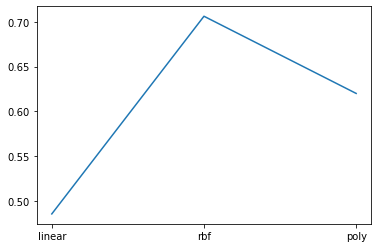

In [49]:
kernels = ['linear','rbf','poly']
accuracies = []
for k in kernels:
    svm = SVC(kernel=k)
    pipe = make_pipeline(scaler, svm)
    scores = cross_val_score(pipe,X, y, cv=10, scoring="f1_macro")
    accuracies.append(scores.mean())

plt.plot(kernels, accuracies)
plt.show()   

In [50]:
# RBF is the best kernel with the highest mean around 0.71.

In [51]:
gammas = [0.01, 0.1, 0.5, 1.0, 10.0, 50.0, 100.0, 1000.0]
accuracies, params = [],[]
for g in gammas:
    svm = SVC(kernel='rbf', gamma=g)
    pipe = make_pipeline(scaler, svm)
    scores = cross_val_score(pipe, X, y, cv=10, scoring='f1_macro')
    accuracies.append(scores.mean())
    params.append(str(g))

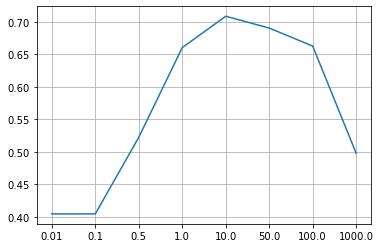

In [52]:
plt.plot(params, accuracies)
plt.grid()
plt.show()

In [53]:
#The best gamma is 10 which generates the highest accuracy around 0.74.

In [54]:
cs =[0.01, 0.1, 1.0, 10.0, 100.0]
accuracies, params = [],[]
for c in cs:
    svm = SVC(kernel='rbf', C=c, gamma=10.0)
    pipe = make_pipeline(scaler, svm)
    scores = cross_val_score(pipe, X, y, cv=10,scoring='f1_macro')
    accuracies.append(scores.mean())
    params.append(c)

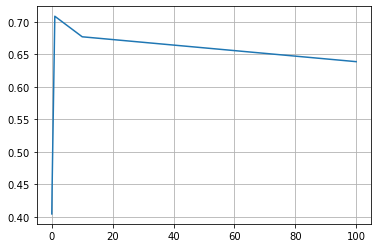

In [55]:
plt.plot(params, accuracies)
plt.grid()
plt.show()

In [ ]:
#The best C is 0.1 generating the highest accuracies around 0.71.

In [166]:
X_train,X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=7, test_size=0.2, stratify=y)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((239, 3), (60, 3), (239,), (60,))

In [168]:
scaler = MinMaxScaler()
svm = SVC(C=0.1, kernel='rbf',gamma=10)
final_pipe = make_pipeline(scaler, svm)

In [169]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=0.1, gamma=10))])

In [175]:
y_test_pred = final_pipe.predict(X_test)

In [176]:
print(classification_report(y_test, y_test_pred)) #the accuracy is higher than the logistic regression model. 

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        41
           1       1.00      0.05      0.10        19

    accuracy                           0.70        60
   macro avg       0.85      0.53      0.46        60
weighted avg       0.79      0.70      0.59        60



In [180]:
from sklearn.model_selection import learning_curve
import numpy as np

In [181]:
train_sizes, train_scores, test_scores = learning_curve(estimator=final_pipe, X=X_train, y=y_train, cv=10)

In [182]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

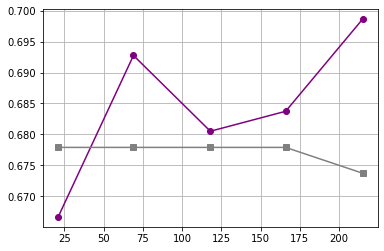

In [184]:
plt.plot(train_sizes, train_mean, color='purple', marker='o')
plt.plot(train_sizes, test_mean, color='grey', marker='s')
plt.grid()
plt.show()

In [ ]:
#There is no need to enlarge the train dataset because the bigger train dataset, the higher variance after 120. 